In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from utils import show_images, show

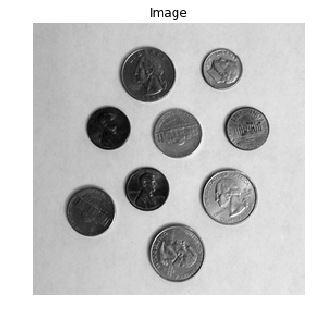

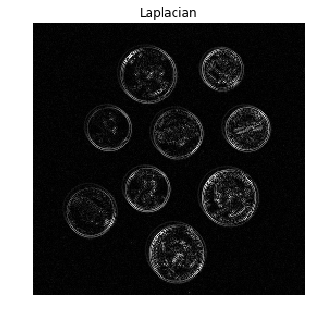

In [6]:
image_dir = "images/coins.png"
image = cv2.imread(image_dir)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(image, 'Image', figsize=(5,5))

lap = cv2.Laplacian(image, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
show(lap, 'Laplacian', (5,5))

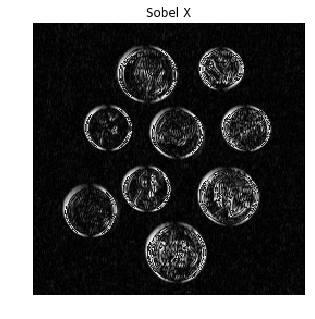

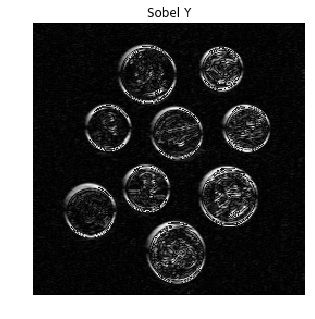

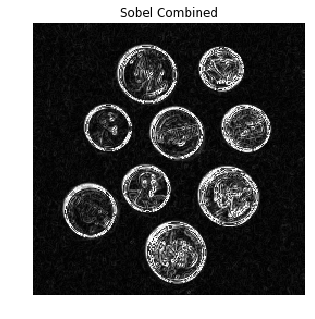

In [7]:
sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

show(sobelX, "Sobel X", (5,5))
show(sobelY, "Sobel Y", (5,5))
show(sobelCombined, "Sobel Combined", (5,5))


# Canny 
## Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges

Sobel或Laplace都是基於微分的邊緣檢測算法，只有當雜訊極少，或者先用平滑濾波抑制雜訊後，才能得到理想結果。

在邊緣檢測中，抑制雜訊和邊緣精確定位很難同時滿足，當我們通過平滑濾波去除噪音的同時，也增加了邊緣定位的不確定性，而提高邊緣檢算子對邊緣敏感度的同時，也增加了對雜訊的敏感度，這邊介紹Canny邊緣檢測算子，Canny在抗雜訊和精確定位間有不錯的效果，OpenCV提供Canny()函式，來進行Canny邊緣檢測，以下為流程，OpenCV已將步驟封裝好，使用時只要呼叫Canny()即可。

The Canny edge detector is a multi-step process. It involves
blurring the image to remove noise, computing Sobel gradient
images in the x and y direction, suppressing edges, and
finally a hysteresis thresholding stage that determines if a
pixel is “edge-like” or not.

<img src='images/canny.png' style='width:500px'>

In this case,
any gradient values below 30 are considered non-edges whereas
any values above 150 are considered edges.


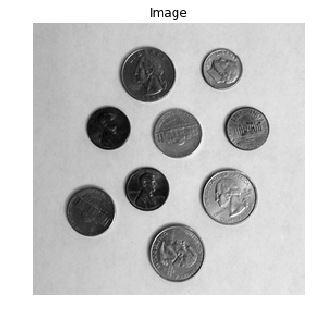

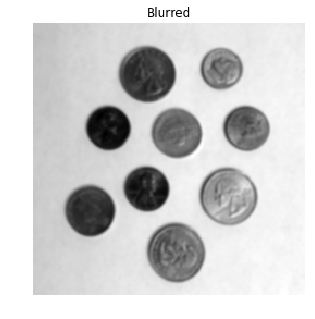

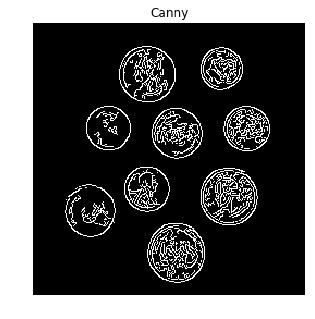

In [9]:
image_dir = "images/coins.png"
image = cv2.imread(image_dir)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
canny = cv2.Canny(image, 30, 150)

show(image, 'Image', (5, 5))
show(blurred, 'Blurred', (5, 5))
show(canny, 'Canny', (5, 5))

print('''In this case,
any gradient values below 30 are considered non-edges whereas
any values above 150 are considered edges.''')

# Coutours

### findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> image, contours, hierarchy
#### mode：取得輪廓的模式，有以下幾種可選擇：

 - CV_RETR_EXTERNAL：只取最外層的輪廓。
 - CV_RETR_LIST：取得所有輪廓，不建立階層(hierarchy)。
 - CV_RETR_CCOMP：取得所有輪廓，儲存成兩層的階層，首階層為物件外圍，第二階層為內部空心部分的輪廓，如果更內部有其餘物件，包含於首階層。
 - CV_RETR_TREE：取得所有輪廓，以全階層的方式儲存。
 
#### method：儲存輪廓點的方法，有以下幾種可選擇：

 - CV_CHAIN_APPROX_NONE：儲存所有輪廓點。
 - CV_CHAIN_APPROX_SIMPLE：對水平、垂直、對角線留下頭尾點，所以假如輪廓為一矩形，只儲存對角的四個頂點。
### findContours 
it returns a 3-tuple of: 
 - (1) our image after applying contour detection (which is modified and essentially destroyed), 
 - (2) the contours themselves, cnts, and 
 - (3) the hierarchy of the contours
 
Our last argument is how we want to approximate the
contour. We use **cv2.CHAIN_APPROX_SIMPLE** to compress
horizontal, vertical, and diagonal segments into their endpoints
only. This saves both computation and memory. If
we wanted all the points along the contour, without compression,
we can pass in **cv2.CHAIN_APPROX_NONE**; however,
be very sparing when using this function. Retrieving all
points along a contour is often unnecessary and is wasteful
of resources.

### drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) -> image

 - image：輸入輸出圖，會將輪廓畫在此影像上。
 - contours：包含所有輪廓的容器(vector)，也就是findContours()所找到的contours。
 - contourIdx：指定畫某個輪廓。 (**給-1畫全部**)
 - color：繪製的顏色。
 - lineType：繪製的線條型態。
 - hierarchy：輪廓階層，也就是findContours()所找到的hierarchy。
 - maxLevel：最大階層的輪廓，可以指定想要畫的輪廓，有輸入hierarchy時才會考慮，輸入的值代表繪製的層數
 
#### maxLevel：

 - 0：繪製指定階層的輪廓。
 - 1：繪製指定階層的輪廓，和他的一階子階層。
 - 2：繪製指定階層的輪廓，和他的一階、二階子階層。剩下數字依此類推。

I count 9 coins in this image


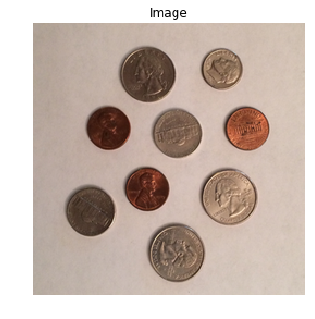

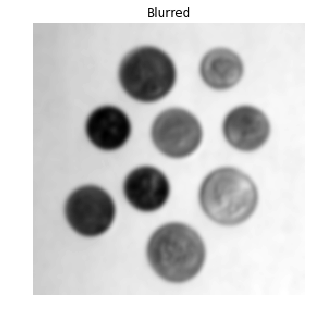

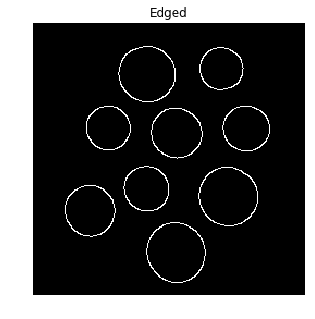

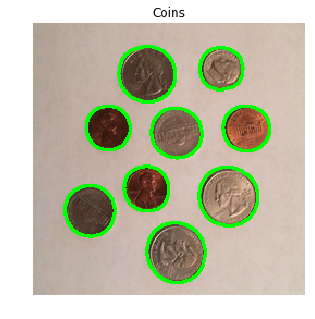

In [3]:
image_dir = "images/coins.png"
image = cv2.imread(image_dir)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image_gray, (11, 11), 0)
show(image, "Image", (5,5))
show(blurred, 'Blurred', (5,5))
edged = cv2.Canny(blurred, 30, 150)
show(edged, "Edged", (5,5))

(_, cnts, _) = cv2.findContours(edged.copy(),
                                cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

print("I count {} coins in this image".format(len(cnts)))

coins = image.copy()
# cv2.drawContours(coins, cnts, -1, (255, 0, 0), 2)

cv2.drawContours(coins, cnts, 0, (0, 255, 0), 2)
cv2.drawContours(coins, cnts, 1, (0, 255, 0), 2)
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)

show(coins, "Coins", (5,5))

## Crop coins
#### boundingRect(points) -> (x, y, w, h)
#### minEnclosingCircle(points) -> ((centerX, centerY), radius)

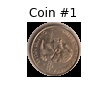

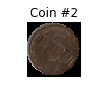

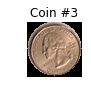

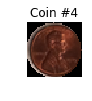

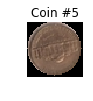

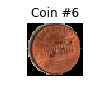

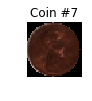

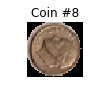

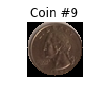

In [12]:
for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    coin = image[y:y + h, x:x + w]
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    show(cv2.bitwise_and(coin, coin, mask = mask), "Coin #{}".format(i + 1), (1,1))